In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [245]:
file = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df = pd.DataFrame(file)

In [246]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [247]:
df.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


<AxesSubplot:>

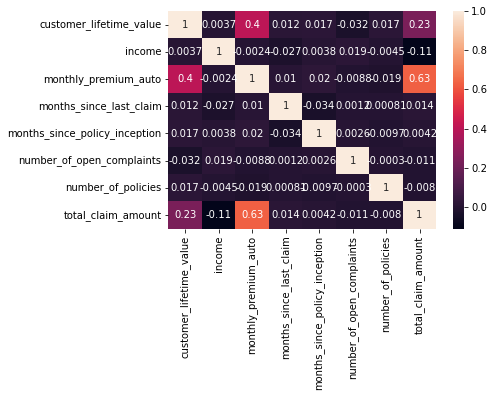

In [248]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [249]:
#there are no highly correlated indy variables i.e with a value greater than 0.9.No need to drop columns


In [250]:
category_list=list(df.select_dtypes(['object']).columns)

cat_df = df[category_list]

cat_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [251]:
#df.drop(columns=['B', 'C'])


cat_df.drop(columns=["effective_to_date"],inplace=True)


In [252]:
education1 = {"high school or below":1, "college":2, "bachelor":3,"master":4, "doctor":5}
cat_df["education"] = cat_df["education"].replace(education1)


In [253]:
cat_df["education"] = cat_df["education"].replace(education1)

In [254]:
cat_df.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [255]:
coverage1 = {"basic":1, "extended":2, "premium":3}



In [256]:
cat_df["coverage"] = cat_df["coverage"].replace(coverage1)


In [257]:
cat_df.employment_status.unique()


array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [258]:
employment_status1 = {"retired":1, "disabled":2, "medical leave":3,"unemployed":4,"employed":5}
cat_df["employment_status"] = cat_df["employment_status"].replace(employment_status1)

In [259]:
#location_code
cat_df.location_code.unique()



array(['suburban', 'urban', 'rural'], dtype=object)

In [260]:
location_code1 = {"suburban":1, "urban":2, "rural":3}

cat_df["location_code"] = cat_df["location_code"].replace(location_code1)


In [261]:
#marital_status
cat_df.marital_status.unique()


array(['married', 'single', 'divorced'], dtype=object)

In [262]:
marital_status1 = {"divorced":1, "single":2, "married":3}

cat_df["marital_status"] = cat_df["marital_status"].replace(marital_status1)


In [263]:
#policy_type

cat_df.policy_type.unique()

array(['corporate auto', 'personal auto', 'special auto'], dtype=object)

In [264]:
policy_type1 = {"special auto":1, "personal auto":2, "corporate auto":3}

cat_df["policy_type"] = cat_df["policy_type"].replace(policy_type1)


In [265]:
cat_df.policy.unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [266]:
policy1 = {"corporate l3":1, "corporate l2":2, "corporate l1":3,
           "personal l3":4,"personal l2":5,"personal l1":6,
           "special l3":7,'special l2':8,"special l1":9}

cat_df["policy"] = cat_df["policy"].replace(policy1)


In [267]:
cat_df.renew_offer_type.unique()

array(['offer3', 'offer4', 'offer2', 'offer1'], dtype=object)

In [268]:
renew_offer_type1 = {"offer1":1, "offer2":2, "offer3":3,"offer4":4}
cat_df["renew_offer_type"] = cat_df["renew_offer_type"].replace(renew_offer_type1)


In [269]:
cat_df.sales_channel.unique()

array(['agent', 'call center', 'branch', 'web'], dtype=object)

In [270]:
sales_channel1 = {"web":1, "branch":2, "call center":3,"agent":4}


cat_df["sales_channel"] = cat_df["sales_channel"].replace(sales_channel1)


In [271]:
cat_df.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [272]:
vehicle_class1 = {"four-door car":1, "suv":2, "two-door car":3,"sports car":4,"luxury car":5,"luxury suv":6}

cat_df["vehicle_class"] = cat_df["vehicle_class"].replace(vehicle_class1)


In [273]:
cat_df.vehicle_size.unique()


array(['medsize', 'small', 'large'], dtype=object)

In [274]:
vehicle_size1 = {"small":1, "medsize":2, "large":3}

cat_df["vehicle_size"] = cat_df["vehicle_size"].replace(vehicle_size1)


In [275]:
#dropping month column
cat_df.drop(columns=["month"],inplace=True)

In [276]:
cat_df

,region,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,1,2,5,m,1,3,3,1,3,4,1,2
1,west region,no,1,2,4,f,1,2,2,4,4,3,1,2
2,east,no,1,3,5,m,1,2,2,4,3,3,2,2
3,north west,yes,2,2,5,m,1,2,3,1,2,2,1,2
4,north west,no,3,3,3,f,1,3,2,5,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,3,3,4,f,1,3,2,6,3,1,5,2
10685,north west,no,1,2,5,f,2,3,2,4,2,2,1,2
10686,central,no,2,3,5,f,3,3,3,1,1,1,6,2
10687,west region,no,3,2,5,f,2,1,2,6,1,2,2,2


In [277]:
cat_df= pd.get_dummies(cat_df,drop_first=True)
cat_df


,coverage,education,employment_status,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_east,region_north west,region_west region,response_yes,gender_m
0,1,2,5,1,3,3,1,3,4,1,2,0,0,0,0,1
1,1,2,4,1,2,2,4,4,3,1,2,0,0,1,0,0
2,1,3,5,1,2,2,4,3,3,2,2,1,0,0,0,1
3,2,2,5,1,2,3,1,2,2,1,2,0,1,0,1,1
4,3,3,3,1,3,2,5,1,2,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,3,4,1,3,2,6,3,1,5,2,0,0,0,0,0
10685,1,2,5,2,3,2,4,2,2,1,2,0,1,0,0,0
10686,2,3,5,3,3,3,1,1,1,6,2,0,0,0,0,0
10687,3,2,5,2,1,2,6,1,2,2,2,0,0,1,0,0


# Moving to the Numbers

In [278]:
numlist=list(df.select_dtypes(['int64']).columns)

num_df = df[numlist]

num_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

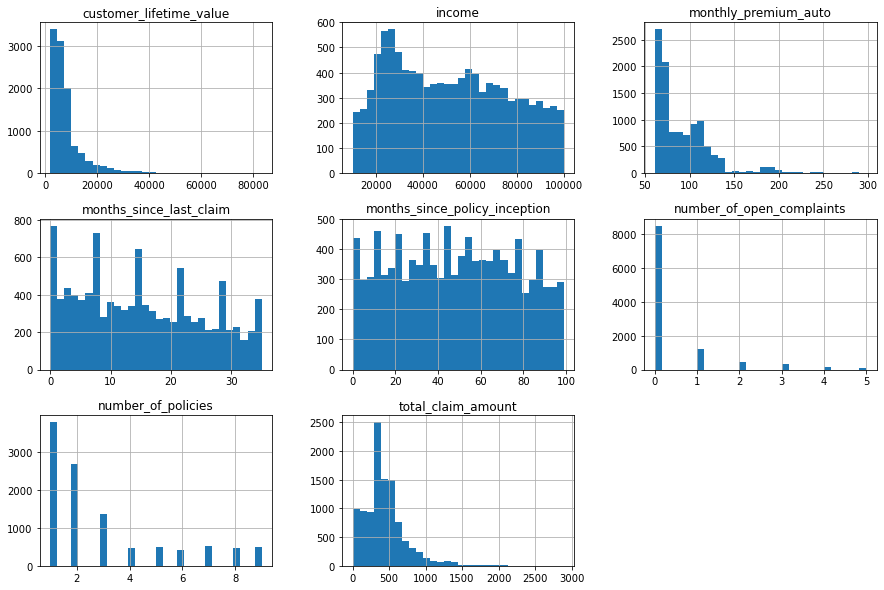

In [279]:
num_df.hist(bins=30, figsize=(15, 10))

In [280]:
#VAR A = 'income' wide range of customer values

#VAR B = 'customer_lifetime_value' very skewed to the left

#Use minmax transform to bring varA's values into the range [0,1].sklearn.preprocessing minmax_scale

In [281]:
#Before using scaler we need to transform our column into a 1d array

income_col = np.array(num_df.income).reshape(-1,1)

In [282]:
from sklearn.preprocessing import MinMaxScaler
from numpy import asarray
    
scaler1 = MinMaxScaler()
scaler = scaler1.fit_transform(income_col)
scaler

scaled_income = scaler

scaled_income

array([[0.42239616],
       [0.9141577 ],
       [0.13455039],
       ...,
       [0.33131726],
       [0.60213021],
       [0.6549075 ]])

In [283]:
num_df['income'] = scaler1.fit_transform(income_col)
num_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,0.422396,61,7,52,0,9,292
1,2228,0.914158,64,3,26,0,1,744
2,14947,0.134550,100,34,31,0,2,480
3,22332,0.434059,97,10,3,0,2,484
4,9025,0.151628,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,0.572623,253,12,40,0,7,1214
10685,5259,0.568231,65,7,68,0,6,273
10686,23893,0.331317,201,11,63,0,2,381
10687,11971,0.602130,158,0,27,4,6,618


In [284]:
scaler1.fit_transform(income_col)

array([[0.42239616],
       [0.9141577 ],
       [0.13455039],
       ...,
       [0.33131726],
       [0.60213021],
       [0.6549075 ]])

In [285]:
clv = num_df['customer_lifetime_value'].values.reshape(-1, 1)

scaler2= StandardScaler()

In [286]:
cust_stand=scaler2.fit_transform(clv)

num_df["customer_lifetime_value"]=cust_stand
num_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.465726,0.422396,61,7,52,0,9,292
1,-0.841022,0.914158,64,3,26,0,1,744
2,1.008413,0.134550,100,34,31,0,2,480
3,2.082245,0.434059,97,10,3,0,2,484
4,0.147311,0.151628,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,1.097984,0.572623,253,12,40,0,7,1214
10685,-0.400293,0.568231,65,7,68,0,6,273
10686,2.309226,0.331317,201,11,63,0,2,381
10687,0.575681,0.602130,158,0,27,4,6,618


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Count'>

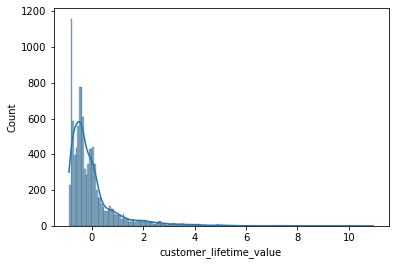

In [287]:
sns.histplot(x="customer_lifetime_value",kde=True,data=num_df)

# Model Time

In [288]:
x=num_df.drop('total_claim_amount', axis=1)
y=num_df.total_claim_amount

In [289]:
X =x._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.465726,0.422396,61,7,52,0,9
1,-0.841022,0.914158,64,3,26,0,1
2,1.008413,0.134550,100,34,31,0,2
3,2.082245,0.434059,97,10,3,0,2
4,0.147311,0.151628,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,1.097984,0.572623,253,12,40,0,7
10685,-0.400293,0.568231,65,7,68,0,6
10686,2.309226,0.331317,201,11,63,0,2
10687,0.575681,0.602130,158,0,27,4,6


In [290]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [291]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.30,random_state=123)

In [292]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [293]:
X_train.shape

(7482, 7)

In [294]:
X_test_scaled=std_scaler.transform(X_test)

In [295]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


In [296]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:51:50   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

# using Scikit Learn

In [297]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)  


LinearRegression()

In [298]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,-0.107733,0.116828,70,23,86,0,2
5697,-0.426466,0.671940,68,6,95,0,5
10524,-0.521126,0.539669,110,6,62,0,1
397,2.082245,0.434059,97,10,3,0,2
6324,-0.811650,0.179501,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,-0.716263,0.710453,76,34,48,0,1
7763,-0.342275,0.764887,72,14,20,2,8
5218,-0.811068,0.144490,62,5,9,0,1
1346,2.265749,0.737359,66,25,3,0,2


In [299]:
model.coef_

array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [300]:
model.intercept_

433.0597433841219

In [301]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [302]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [303]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [307]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345,260.523049
4072,345,353.767527
4549,257,297.680914
4211,445,290.014675
3081,523,552.919901
...,...,...
3488,404,315.605110
1667,554,424.020240
1516,350,367.573342
10215,27,317.679034


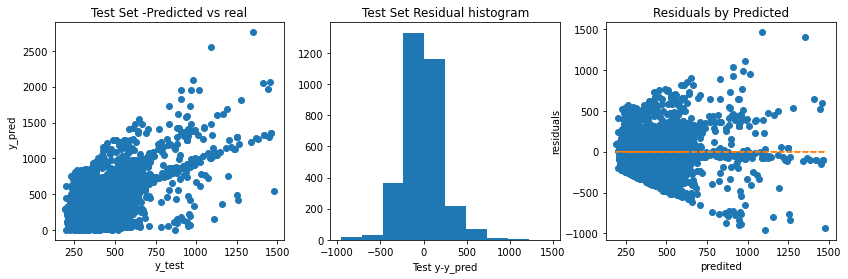

In [308]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))


# Main concat df

In [312]:
#main_df= num_df.concat(cat_df,axis=1)

main_df=pd.concat([num_df,cat_df],axis=1)
main_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,region_east,region_north west,region_west region,response_yes,gender_m
0,-0.465726,0.422396,61,7,52,0,9,292,1,2,...,1,3,4,1,2,0,0,0,0,1
1,-0.841022,0.914158,64,3,26,0,1,744,1,2,...,4,4,3,1,2,0,0,1,0,0
2,1.008413,0.134550,100,34,31,0,2,480,1,3,...,4,3,3,2,2,1,0,0,0,1
3,2.082245,0.434059,97,10,3,0,2,484,2,2,...,1,2,2,1,2,0,1,0,1,1
4,0.147311,0.151628,117,33,31,0,7,707,3,3,...,5,1,2,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.097984,0.572623,253,12,40,0,7,1214,3,3,...,6,3,1,5,2,0,0,0,0,0
10685,-0.400293,0.568231,65,7,68,0,6,273,1,2,...,4,2,2,1,2,0,1,0,0,0
10686,2.309226,0.331317,201,11,63,0,2,381,2,3,...,1,1,1,6,2,0,0,0,0,0
10687,0.575681,0.602130,158,0,27,4,6,618,3,2,...,6,1,2,2,2,0,0,1,0,0


In [330]:
x2=main_df.drop('total_claim_amount', axis=1)
y2=main_df.total_claim_amount

In [334]:
X_train2, X_test2, y_train2, y_test2= train_test_split(x2, y2, test_size=.30,random_state=123)

In [335]:
X_train2.shape

(7482, 23)

In [337]:
std_scaler2=StandardScaler().fit(X_train2)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled2=std_scaler2.transform(X_train2)
X_test_scaled2=std_scaler2.transform(X_test2)


In [327]:
print(X_train_scaled2)
print("--------")
print(X_test_scaled2)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


In [338]:
X_train_const_scaled2 = sm.add_constant(X_train_scaled2) # adding a constant

model = sm.OLS(y_train2, X_train_const_scaled2).fit()
predictions_train2 = model.predict(X_train_const_scaled2) 

X_test_const_scaled2 = sm.add_constant(X_test_scaled2) # adding a constant
predictions_test2 = model.predict(X_test_const_scaled2) 
print_model2 = model.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     915.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:13:52   Log-Likelihood:                -48127.
No. Observations:                7482   AIC:                         9.630e+04
Df Residuals:                    7458   BIC:                         9.647e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.742    248.639      0.0

# Model 3


In [340]:


hotcode_df = df[category_list]
hotcode_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [344]:
hotcode_df= pd.get_dummies(hotcode_df,drop_first=True)
hotcode_df

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [361]:
second_main_df=pd.concat([hotcode_df,num_df],axis=1)
second_main_df

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,0,0,0,0,0,1,0,0,0,...,1,0,-0.465726,0.422396,61,7,52,0,9,292
1,0,0,1,0,0,0,1,0,0,0,...,1,0,-0.841022,0.914158,64,3,26,0,1,744
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1.008413,0.134550,100,34,31,0,2,480
3,0,1,0,1,1,0,1,0,0,0,...,1,0,2.082245,0.434059,97,10,3,0,2,484
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0.147311,0.151628,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,1,0,1.097984,0.572623,253,12,40,0,7,1214
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,-0.400293,0.568231,65,7,68,0,6,273
10686,0,0,0,0,1,0,0,0,0,0,...,1,0,2.309226,0.331317,201,11,63,0,2,381
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0.575681,0.602130,158,0,27,4,6,618


In [362]:
x3=second_main_df.drop('total_claim_amount', axis=1)
y3=second_main_df.total_claim_amount

In [350]:
X_train3, X_test3, y_train3, y_test3= train_test_split(x3, y3, test_size=.30,random_state=123)

In [363]:
std_scaler3=StandardScaler().fit(X_train3)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled3=std_scaler3.transform(X_train3)
X_test_scaled3=std_scaler3.transform(X_test3)


In [364]:
print(X_train_scaled3)
print("--------")
print(X_test_scaled3)

[[-0.11021627 -1.27291744 -0.67143823 ... -0.73364851 -0.37906061
   1.02599946]
 [-0.42794064  0.74729478 -0.72925469 ... -0.73364851 -0.37906061
  -0.97465938]
 [-0.5223013   0.26592193  0.48489091 ... -0.73364851  2.63810054
  -0.97465938]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -0.73364851 -0.37906061
  -0.97465938]
 [ 2.25575772  0.98537142 -0.78707115 ... -0.73364851  2.63810054
   1.02599946]
 [ 1.18923585  0.68583346 -0.55580532 ... -0.73364851 -0.37906061
  -0.97465938]]
--------
[[-0.40967729  1.58428551 -0.61362178 ... -0.73364851 -0.37906061
  -0.97465938]
 [-0.7597249  -0.93947257 -0.64253    ...  1.36305055 -0.37906061
   1.02599946]
 [ 0.57248529 -1.23371005 -0.90270406 ... -0.73364851  2.63810054
  -0.97465938]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -0.73364851 -0.37906061
   1.02599946]
 [-0.42547654 -0.97370317 -0.81597938 ... -0.73364851 -0.37906061
  -0.97465938]
 [-0.49881985 -0.95695203  0.71615674 ... -0.73364851 -0.37906061
  -0.97465938]]


In [366]:
X_train_const_scaled3 = sm.add_constant(X_train_scaled3) # adding a constant

model3 = sm.OLS(y_train3, X_train_const_scaled3).fit()
predictions_train3 = model3.predict(X_train_const_scaled3) 

X_test_const_scaled3 = sm.add_constant(X_test_scaled3) # adding a constant
predictions_test3 = model3.predict(X_test_const_scaled3) 
print_model3 = model3.summary()
print(print_model3)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     915.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:43:59   Log-Likelihood:                -48127.
No. Observations:                7482   AIC:                         9.630e+04
Df Residuals:                    7458   BIC:                         9.647e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.742    248.639      0.0